In [ ]:
#Adjacency Matrix
import numpy as np

# Define the adjacency matrix
adjacency_matrix = np.array([[0, 1, 0, 0],
                            [0, 0, 1, 0],
                            [0, 1, 0, 1],
                            [1, 0, 1, 0]])

# Set the damping factor
damping_factor = 0.85

# Initialize the PageRank values
num_pages = len(adjacency_matrix)
page_rank = np.ones(num_pages) / num_pages

#Number of iterations
num_iterations = 100

In [ ]:
#Number of iterations
num_iterations = 100

for i in range(num_iterations):
    new_page_rank = np.zeros(num_pages)
    for j in range(num_pages):
      # Calculate the PageRank contribution from each linking page
      linking_pages = [k for k in range(num_pages) if adjacency_matrix[k, j] == 1]
      for linking_page in linking_pages:
          new_page_rank[j] += page_rank[linking_page] / sum(adjacency_matrix[linking_page, :])
      new_page_rank[j] = damping_factor * new_page_rank[j] + (1 - damping_factor) / num_pages
    page_rank = new_page_rank

#Print the final PageRank values
for page, rank in enumerate(page_rank):
    print(f"PR(Page {page + 1}) ={rank:.3f}")

PR(Page 1) =0.122
PR(Page 2) =0.302
PR(Page 3) =0.378
PR(Page 4) =0.198


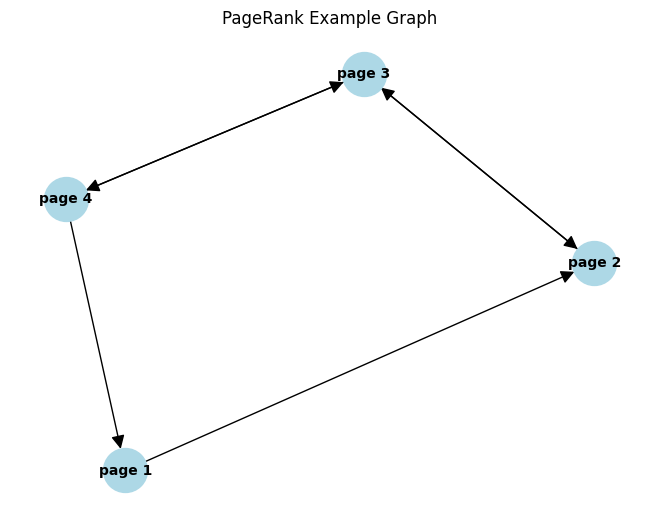

In [ ]:
#Membuat Graph dari Adjacency Matrix
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#Define the adjacency matrix
adjacency_matrix = np.array([[0, 1, 0, 0],
                             [0, 0, 1, 0],
                             [0, 1, 0, 1],
                             [1, 0, 1, 0]])

#Create a directed graph
G = nx.DiGraph()

#Add nodes
num_pages = len(adjacency_matrix)
G.add_nodes_from(range(num_pages))

#Add edges based on the adjacency matrix
for i in range(num_pages):
    for j in range(num_pages):
        if adjacency_matrix[i, j] == 1:
            G.add_edge(i, j)

#Draw the graph
pos = nx.spring_layout(G) #layout the graph
labels = {i: f"page {i+1}" for i in range(num_pages)}
nx.draw(G, pos, with_labels = True, labels = labels, node_size = 1000, node_color = 'lightblue', font_size = 10, font_color = 'black', font_weight = 'bold', arrowsize = 20)
plt.title("PageRank Example Graph")
plt.show()

In [ ]:
#slide 28
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#slide 29
myWeb = nx.DiGraph()
myPages = range(1,5)

In [ ]:
#slide 30
connections = [(1,3),(2,1),(2,3),(3,1),(3,2),(3,4),(4,5),(5,1),(5,4)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)

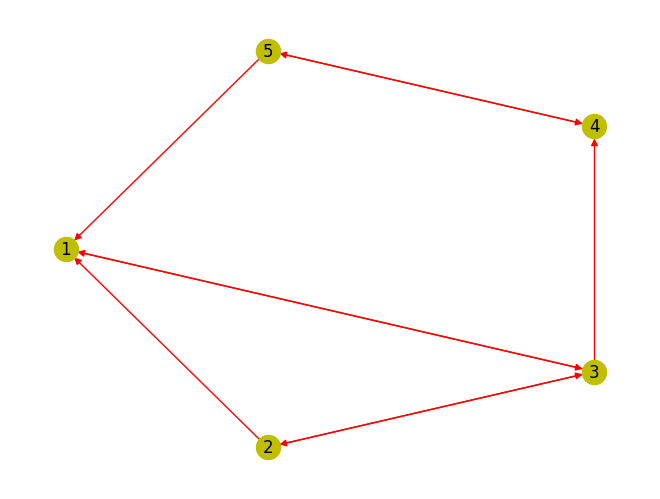

In [ ]:
#slide 31
pos=nx.shell_layout(myWeb)
nx.draw(myWeb, pos, arrows=True, with_labels=True, node_color='y', edge_color='r')
plt.show()

In [ ]:
import networkx as nx
import numpy as np

def createPageRank(aGraph):
    nodes_set = len(aGraph)
    M = nx.to_numpy_array(aGraph) #menggunakan metode to_numpy_array
    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outwards = np.array(1.0 / outwards)
    G = np.multiply(M, prob_outwards[:, np.newaxis])

    p = np.ones(nodes_set)/float(nodes_set)
    return G,p

#contoh penggunaan
myWeb = nx.DiGraph()
connections = [(1,3),(2,1),(2,3),(3,1),(3,2),(3,4),(4,5),(5,1),(5,4)]
myWeb.add_edges_from(connections)

G, p = createPageRank(myWeb)
print(G)

[[0.         1.         0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.        ]
 [0.5        0.5        0.         0.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.5        0.         0.         0.5        0.        ]]


In [ ]:
import numpy as np

# Matriks adjacency (0 berarti tidak ada tautan)
adjacency_matrix = np.array([[0, 1, 1, 1, 0],
                             [0, 0, 1, 0, 0],
                             [1, 0, 0, 0, 0],
                             [0, 0, 1, 0, 1],
                             [0, 0, 1, 1, 0,]])

#Inisialisasi nilai awal PageRank
pagerank = np.array([1, 1, 1, 1, 1], dtype=float)

# Faktor damping
damping_factor = 0.85

# Jumlah iterasi
num_iterations = 100

from networkx.readwrite.json_graph import adjacency
for _ in range(num_iterations):
  # Inisialisasi PageRank baru
  new_pagerank = np.zeros(pagerank.shape, dtype=float)

  for i in range(adjacency_matrix.shape[0]):
    for j in range(adjacency_matrix.shape[1]):
      # Hitung jumlah tautan keluar dari halaman i
      num_outlinks = np.sum(adjacency_matrix[i, :])

      #perbarui PageRank berdasarkan rumus PageRank
      if num_outlinks > 0:
        new_pagerank[j] += (damping_factor * pagerank[i] / num_outlinks)

  # Normalisasi PageRank
  new_pagerank += (1 - damping_factor) / len(pagerank)

  # Perbarui nilai PageRank
  pagerank = new_pagerank

# Hasil PageRank
print("Hasil PageRank:")
print(pagerank)

Hasil PageRank:
[1.72510772e+45 1.72510772e+45 1.72510772e+45 1.72510772e+45
 1.72510772e+45]


In [ ]:
#slide 43
import numpy as np

# Jumlah halaman
num_pages = 5

# Vectors of outlinks
outlinks = np.array([3, 2, 1, 2, 2])

# Vectors of inlinks
inlinks = np.array([1, 2, 1, 2, 1])

# Inisialisasi nilai awal PageRank
pagerank = np.ones(num_pages, dtype=float) / num_pages

# Faktor damping
damping_factor = 0.85

# Jumlah iterasi
num_iterations = 100

for _ in range(num_iterations):
  # Inisialisasi PageRank baru
  new_pagerank = np.zeros(num_pages, dtype=float)

  for i in range(num_pages):
    for j in range(num_pages):
      if i != j and outlinks[j] > 0:
        new_pagerank[i] += damping_factor * (pagerank[j] / outlinks[j])

  # Terapkan faktor damping dan tambahkan nilai konstan
  pagerank = (1 - damping_factor) / num_pages + new_pagerank

# Hasil PageRank
print("Hasil PageRank:")
for i, pr in enumerate(pagerank):
  print(f"Halaman {chr(ord('A')+i)}: {pr:.4f}")

Hasil PageRank:
Halaman A: 379781916076663755421777920.0000
Halaman B: 356329657326501560173199360.0000
Halaman C: 300635253803169860934434816.0000
Halaman D: 356329657326501628892676096.0000
Halaman E: 356329657326501628892676096.0000


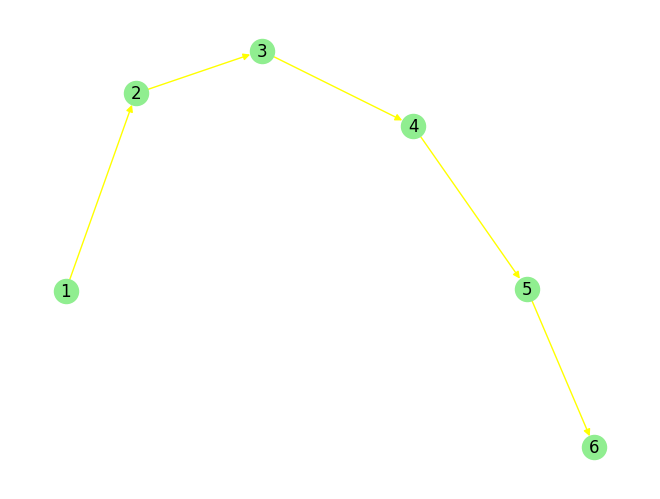

[[ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.]
 [nan nan nan nan nan nan]]


<ipython-input-11-aa1506eada4e>:8: RuntimeWarning: divide by zero encountered in divide
  prob_outwards = np.array(1.0 / outwards)
<ipython-input-11-aa1506eada4e>:9: RuntimeWarning: invalid value encountered in multiply
  G = np.multiply(M, prob_outwards[:, np.newaxis])


In [ ]:
myWeb = nx.DiGraph()
myPages = range(1,6)

connections = [(1,2),(2,3),(3,4),(4,5),(5,6)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)
pos=nx.spring_layout(myWeb, seed=40)
nx.draw(myWeb, pos, arrows=True, with_labels=True, node_color='lightgreen', edge_color='yellow')
plt.show()
G,p = createPageRank (myWeb)
print (G)

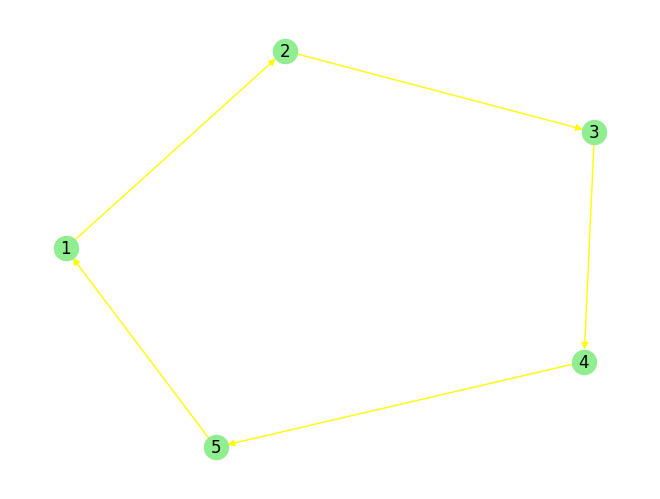

[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]


In [ ]:
#Latihan 2
myWeb = nx.DiGraph()
myPages = range(1,6)

connections = [(1,2),(2,3),(3,4),(4,5),(5,1)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)
pos=nx.spring_layout(myWeb, seed=40)
nx.draw(myWeb, pos, arrows=True, with_labels=True, node_color='lightgreen', edge_color='yellow')
plt.show()
G,p = createPageRank (myWeb)
print (G)

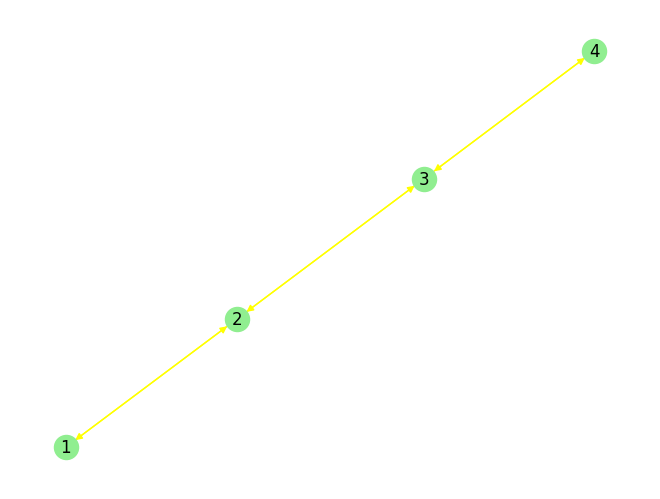

[[0.  1.  0.  0. ]
 [0.5 0.  0.5 0. ]
 [0.  0.5 0.  0.5]
 [0.  0.  1.  0. ]]


In [ ]:
#Latihan 3
myWeb = nx.DiGraph()
myPages = range(1,4)

connections = [(1,2),(2,1),(2,3),(3,2),(3,4),(4,3)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)
pos=nx.spring_layout(myWeb, seed=40)
nx.draw(myWeb, pos, arrows=True, with_labels=True, node_color='lightgreen', edge_color='yellow')
plt.show()
G,p = createPageRank (myWeb)
print (G)

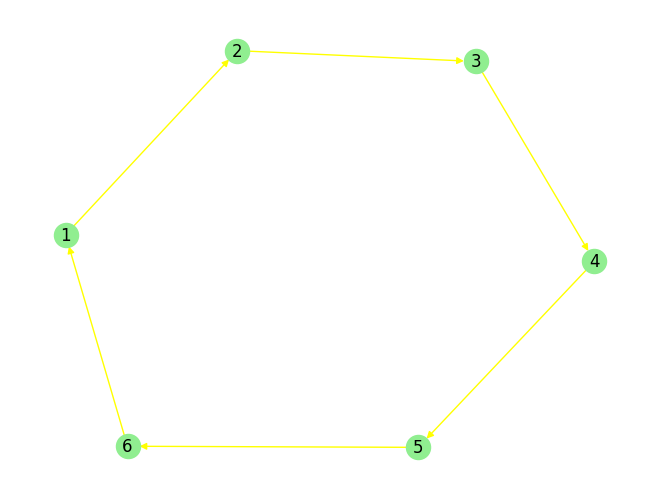

[[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]]


In [ ]:
#Latihan 4
myWeb = nx.DiGraph()
myPages = range(1,6)

connections = [(1,2),(2,3),(3,4),(4,5),(5,6),(6,1)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)
pos=nx.spring_layout(myWeb, seed=40)
nx.draw(myWeb, pos, arrows=True, with_labels=True, node_color='lightgreen', edge_color='yellow')
plt.show()
G,p = createPageRank (myWeb)
print (G)

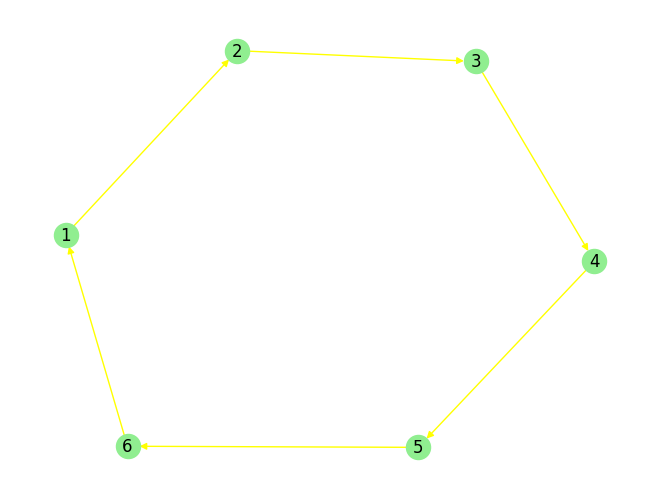

[[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]]


In [ ]:
#Latihan 4
myWeb = nx.DiGraph()
myPages = range(1,6)

connections = [(1,2),(2,3),(3,4),(4,5),(5,6),(6,1)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)
pos=nx.spring_layout(myWeb, seed=40)
nx.draw(myWeb, pos, arrows=True, with_labels=True, node_color='lightgreen', edge_color='yellow')
plt.show()
G,p = createPageRank (myWeb)
print (G)

In [ ]:
#Laatihan 5

myWeb = nx.DiGraph()
myPages = range(1,4)

connections = [(1,2),(2,1),(2,3),(3,2),(3,4),(4,3),(4,1)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)
pos=nx.spring_layout(myWeb, seed=40)
nx.draw(myWeb, pos, arrows=True, with_labels=True, node_color='lightgreen', edge_color='yellow')
plt.show()
G,p = createPageRank (myWeb)
print (G)

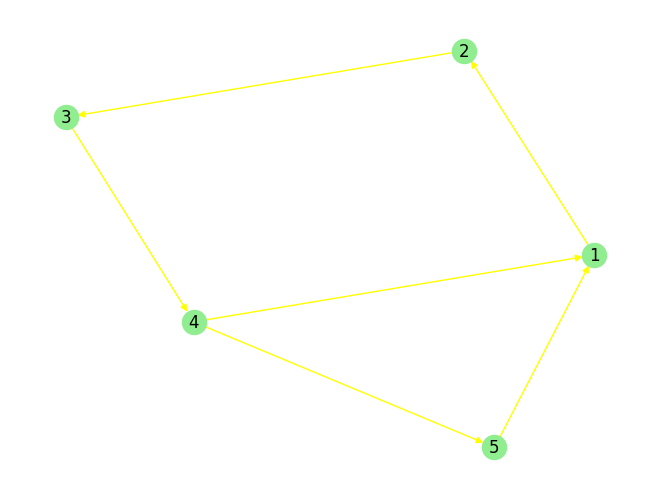

[[0.  1.  0.  0.  0. ]
 [0.  0.  1.  0.  0. ]
 [0.  0.  0.  1.  0. ]
 [0.5 0.  0.  0.  0.5]
 [1.  0.  0.  0.  0. ]]


In [ ]:
#Latihan 6

myWeb = nx.DiGraph()
myPages = range(1,5)

connections = [(1,2),(2,3),(3,4),(4,1),(4,5),(5,1)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)
pos=nx.kamada_kawai_layout(myWeb)
nx.draw(myWeb, pos, arrows=True, with_labels=True, node_color='lightgreen', edge_color='yellow')
plt.show()
G,p = createPageRank (myWeb)
print (G)

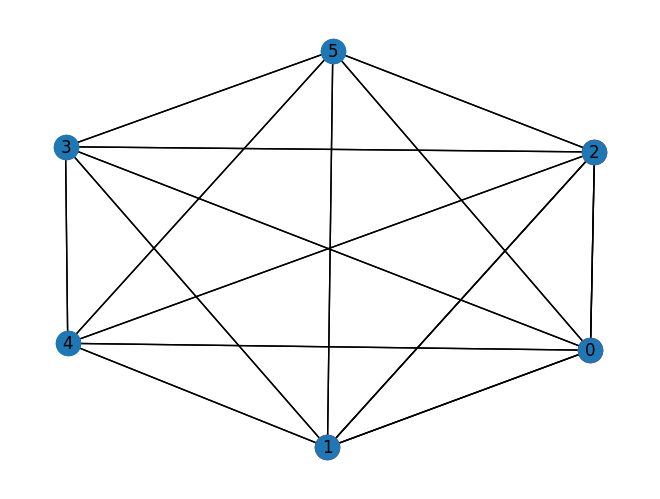

[[ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.]
 [nan nan nan nan nan nan]]


<ipython-input-11-aa1506eada4e>:8: RuntimeWarning: divide by zero encountered in divide
  prob_outwards = np.array(1.0 / outwards)
<ipython-input-11-aa1506eada4e>:9: RuntimeWarning: invalid value encountered in multiply
  G = np.multiply(M, prob_outwards[:, np.newaxis])


In [ ]:
#Latihan 7
myWeb = nx.DiGraph()
myPages = range(1,6)

connections = [(1,2),(2,3),(3,4),(4,5),(5,6)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)
myWeb = nx.complete_graph(6)
pos = nx.spring_layout(myWeb)
nx.draw(myWeb, pos=pos)
nx.draw(myWeb.subgraph([0, 1, 2]), pos=pos, node_color="red")
nx.draw(myWeb, pos, arrows=True, with_labels=True)
plt.show()

myWeb = nx.DiGraph()
myPages = range(1,6)

myWeb = nx.DiGraph()
connections = [(1,2),(2,3),(3,4),(4,5),(5,6)]
myWeb.add_edges_from(connections)

G, p = createPageRank(myWeb)
print(G)